In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm
import sklearn.metrics as metrics

%matplotlib inline

In [2]:
s_train = pd.read_csv('datasets/train.csv')
s_test = pd.read_csv('datasets/test.csv')

In [3]:
def clean_header(df):
    
    '''This function removes wierd characters and spaces from columns and keeps everything lowercase'''
    
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')','')

In [4]:
# clean header script
clean_header(s_train)
clean_header(s_test)
s_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
s_train[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']] = s_train[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']].apply(lambda x: x.astype(str).str.lower().fillna(0))
s_test[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']] = s_test[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']].apply(lambda x: x.astype(str).str.lower().fillna(0))

In [6]:
s_test['exter_qual'].head()

0    ta
1    ta
2    gd
3    gd
4    ta
Name: exter_qual, dtype: object

In [7]:
# Changing like qualitative data to numeric for easier analysis 
s_train[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']] = s_train[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']].replace({'ex':1, 'gd':2, 'ta':3, 'fa':4, 'po':5, 'na':0, 'nan':0})
s_test[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']] = s_test[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']].replace({'ex':1, 'gd':2, 'ta':3, 'fa':4, 'po':5, 'na':0, 'nan':0})

In [8]:
s_train

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


In [9]:
qual_train_feat = pd.DataFrame(s_train[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']])
qual_test_feat = pd.DataFrame(s_test[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']])

In [10]:
qual_train_feat

,exter_qual,exter_cond,bsmt_qual,bsmt_cond,kitchen_qual,garage_qual,garage_cond
0,2,3,3,3,2,3,3
1,2,3,2,3,2,3,3
2,3,2,3,3,2,3,3
3,3,3,2,3,3,3,3
4,3,3,4,2,3,3,3
...,...,...,...,...,...,...,...
2046,2,3,2,3,2,3,3
2047,3,3,3,3,3,3,3
2048,3,3,3,3,3,4,4
2049,3,3,3,3,3,3,3


In [12]:
type(qual_train_feat)

pandas.core.frame.DataFrame

In [14]:
s_test['saleprice'] = np.mean(s_train['saleprice'])
s_test['saleprice']

0      181469.701609
1      181469.701609
2      181469.701609
3      181469.701609
4      181469.701609
           ...      
873    181469.701609
874    181469.701609
875    181469.701609
876    181469.701609
877    181469.701609
Name: saleprice, Length: 878, dtype: float64

In [24]:
#Trying out a very small model first. 
features = ['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']
X_train = qual_train_feat
X_test = qual_test_feat
print(X_train.describe())
print(X_test.describe())
print(X_train.info())

        exter_qual   exter_cond    bsmt_qual    bsmt_cond  kitchen_qual  \
count  2051.000000  2051.000000  2051.000000  2051.000000   2051.000000   
mean      2.593857     2.914188     2.349098     2.909800      2.482691   
std       0.587962     0.372792     0.793278     0.569258      0.665577   
min       1.000000     1.000000     0.000000     0.000000      1.000000   
25%       2.000000     3.000000     2.000000     3.000000      2.000000   
50%       3.000000     3.000000     2.000000     3.000000      3.000000   
75%       3.000000     3.000000     3.000000     3.000000      3.000000   
max       4.000000     5.000000     5.000000     5.000000      4.000000   

       garage_qual  garage_cond  
count  2051.000000  2051.000000  
mean      2.863481     2.856168  
std       0.735104     0.726693  
min       0.000000     0.000000  
25%       3.000000     3.000000  
50%       3.000000     3.000000  
75%       3.000000     3.000000  
max       5.000000     5.000000  
       exter_qual 

In [16]:
y_train = s_train['saleprice']
y_test = s_test['saleprice']
print(y_train.shape)
print(y_test.shape)

(2051,)
(878,)


In [17]:
lr = LinearRegression()

In [18]:
# Fit the model on training data
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
#y_pred = lr.predict(X_test)

In [ ]:
#y_pred.shape

In [ ]:
# baseline R2
#cross_val_score(lr, X_train, y_train).mean()

In [20]:
poly = PolynomialFeatures(include_bias=False)

In [21]:
poly

PolynomialFeatures(include_bias=False)

In [22]:
X_poly = poly.fit_transform(X_train)

In [25]:
# View X_poly in a DataFrame
pd.DataFrame(X_poly, columns=poly.get_feature_names(features))

,exter_qual,exter_cond,bsmt_qual,bsmt_cond,kitchen_qual,garage_qual,garage_cond,exter_qual^2,exter_qual exter_cond,exter_qual bsmt_qual,...,bsmt_cond^2,bsmt_cond kitchen_qual,bsmt_cond garage_qual,bsmt_cond garage_cond,kitchen_qual^2,kitchen_qual garage_qual,kitchen_qual garage_cond,garage_qual^2,garage_qual garage_cond,garage_cond^2
0,2.0,3.0,3.0,3.0,2.0,3.0,3.0,4.0,6.0,6.0,...,9.0,6.0,9.0,9.0,4.0,6.0,6.0,9.0,9.0,9.0
1,2.0,3.0,2.0,3.0,2.0,3.0,3.0,4.0,6.0,4.0,...,9.0,6.0,9.0,9.0,4.0,6.0,6.0,9.0,9.0,9.0
2,3.0,2.0,3.0,3.0,2.0,3.0,3.0,9.0,6.0,9.0,...,9.0,6.0,9.0,9.0,4.0,6.0,6.0,9.0,9.0,9.0
3,3.0,3.0,2.0,3.0,3.0,3.0,3.0,9.0,9.0,6.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
4,3.0,3.0,4.0,2.0,3.0,3.0,3.0,9.0,9.0,12.0,...,4.0,6.0,6.0,6.0,9.0,9.0,9.0,9.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,2.0,3.0,2.0,3.0,2.0,3.0,3.0,4.0,6.0,4.0,...,9.0,6.0,9.0,9.0,4.0,6.0,6.0,9.0,9.0,9.0
2047,3.0,3.0,3.0,3.0,3.0,3.0,3.0,9.0,9.0,9.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
2048,3.0,3.0,3.0,3.0,3.0,4.0,4.0,9.0,9.0,9.0,...,9.0,9.0,12.0,12.0,9.0,12.0,12.0,16.0,16.0,16.0
2049,3.0,3.0,3.0,3.0,3.0,3.0,3.0,9.0,9.0,9.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


In [29]:
cross_val_score(lr, X_poly, y_train, cv=5).mean()

0.659579059610623

In [36]:
# Learning the means and the standard deviations for each column
sc = StandardScaler()
sc.fit(X_train)
print("Means:\n", sc.mean_, '\n')
print("Standard Deviations:\n", sc.scale_, '\n')

Means:
 [2.59385666 2.9141882  2.349098   2.9098001  2.48269137 2.86348123
 2.85616772] 

Standard Deviations:
 [0.58781823 0.37270155 0.79308501 0.56911961 0.66541488 0.73492479
 0.72651579] 



In [37]:
X_scaled = sc.transform(X_train)
X_scaled[0:5]

array([[-1.0102726 ,  0.23024267,  0.8207216 ,  0.15849024, -0.72539913,
         0.18575883,  0.19797543],
       [-1.0102726 ,  0.23024267, -0.44017728,  0.15849024, -0.72539913,
         0.18575883,  0.19797543],
       [ 0.69093356, -2.45286931,  0.8207216 ,  0.15849024, -0.72539913,
         0.18575883,  0.19797543],
       [ 0.69093356,  0.23024267, -0.44017728,  0.15849024,  0.7774227 ,
         0.18575883,  0.19797543],
       [ 0.69093356,  0.23024267,  2.08162049, -1.59860964,  0.7774227 ,
         0.18575883,  0.19797543]])

In [38]:
np.mean(X_scaled)

-4.330465235007924e-18

In [39]:
cross_val_score(lr, X_scaled, y_train).mean()

0.6082643045814382

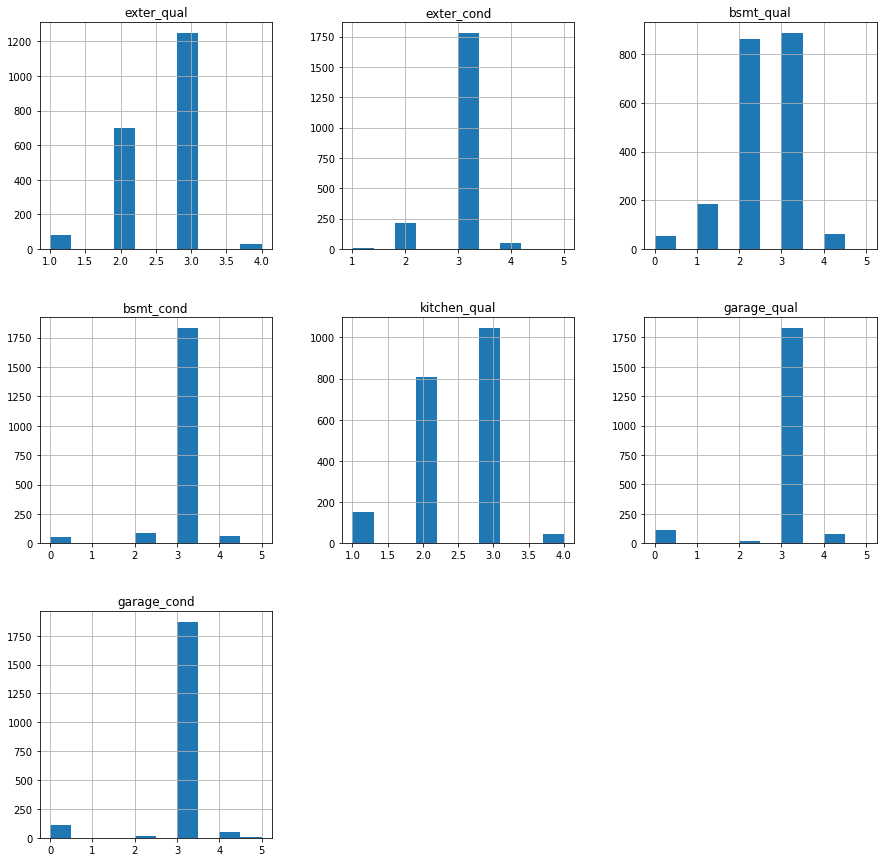

In [40]:
X_train.hist(figsize=(15, 15));

In [51]:
# sns.pairplot(X_train, y_train, corner=True);

In [54]:
import seaborn as sns
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=s_train,
    x=X_train, y=y_train,
    palette=cmap,
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

ValueError: Shape of passed values is (7, 2), indices imply (2051, 2)

In [65]:
sns.relplot(X_train, y_train, data=X_scaled, kind="scatter")

ValueError: Shape of passed values is (7, 2), indices imply (2051, 2)